In [128]:
import numpy as np # linear algebra
import pandas as pd # data manipulation and analysis
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
sns.set_style('whitegrid') # set style for visualization
import warnings # ignore warnings
warnings.filterwarnings('ignore')
import requests, zipfile, io
from sklearn.impute import KNNImputer

url = "https://github.com/devtlv/Datasets-DA-Bootcamp-2-/raw/refs/heads/main/Week%204%20-%20Data%20Understanding/W4D5%20-%20Mini%20project/Data%20Science%20Job%20Salaries.zip"

r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall("data")

In [129]:
# Loading Dataset
df = pd.read_csv('.\data\ds_salaries.csv')
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB
None
   Unnamed: 0  work_year experience_level employment_type  \
0           0       2020               MI              FT   
1           1       2020               SE    

In [130]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [131]:
# Differentiating between Categorical/Numeric Columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_categorical = df.drop(columns=df_numeric.columns)

for col in df_categorical:
    print(df[col].value_counts(dropna=False))

experience_level
SE    280
MI    213
EN     88
EX     26
Name: count, dtype: int64
employment_type
FT    588
PT     10
CT      5
FL      4
Name: count, dtype: int64
job_title
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Machine Learning Scientist                    8
Big Data Engineer                             8
Director of Data Science                      7
AI Scientist                                  7
Principal Data Scientist                      7
Data Science Consultant                       7
Data Analytics Manager                        7
BI Data Analyst                               6
Computer Vision Engineer                      6
ML Engineer                                   6
Lead Data

In [137]:
# Checking for Duplicates
duplicates = df.duplicated()
print("Number of Duplicate Rows:", duplicates.sum())

Number of Duplicate Rows: 0


In [138]:
# Ensure experience_level is ordered
experience_order = ['EN', 'MI', 'SE', 'EX']
df['experience_level'] = pd.Categorical(df['experience_level'],
                                        categories=experience_order,
                                        ordered=True)

# Aggregate
grouped = df.groupby('experience_level')['salary_in_usd'].agg(['median','mean']).reset_index()

print(grouped)

  experience_level    median           mean
0               EN   56500.0   61643.318182
1               MI   76940.0   87996.056338
2               SE  135500.0  138617.292857
3               EX  171437.5  199392.038462


In [142]:
# Median / Mean Values for each Experience Level
for _, row in grouped.iterrows():
    print(f'Exp Lvl: {row['experience_level']}\nMedian Salary: {int(row['median'])}\nMean Salary: {round(row['mean'],2)}\n')

Exp Lvl: EN
Median Salary: 56500
Mean Salary: 61643.32

Exp Lvl: MI
Median Salary: 76940
Mean Salary: 87996.06

Exp Lvl: SE
Median Salary: 135500
Mean Salary: 138617.29

Exp Lvl: EX
Median Salary: 171437
Mean Salary: 199392.04



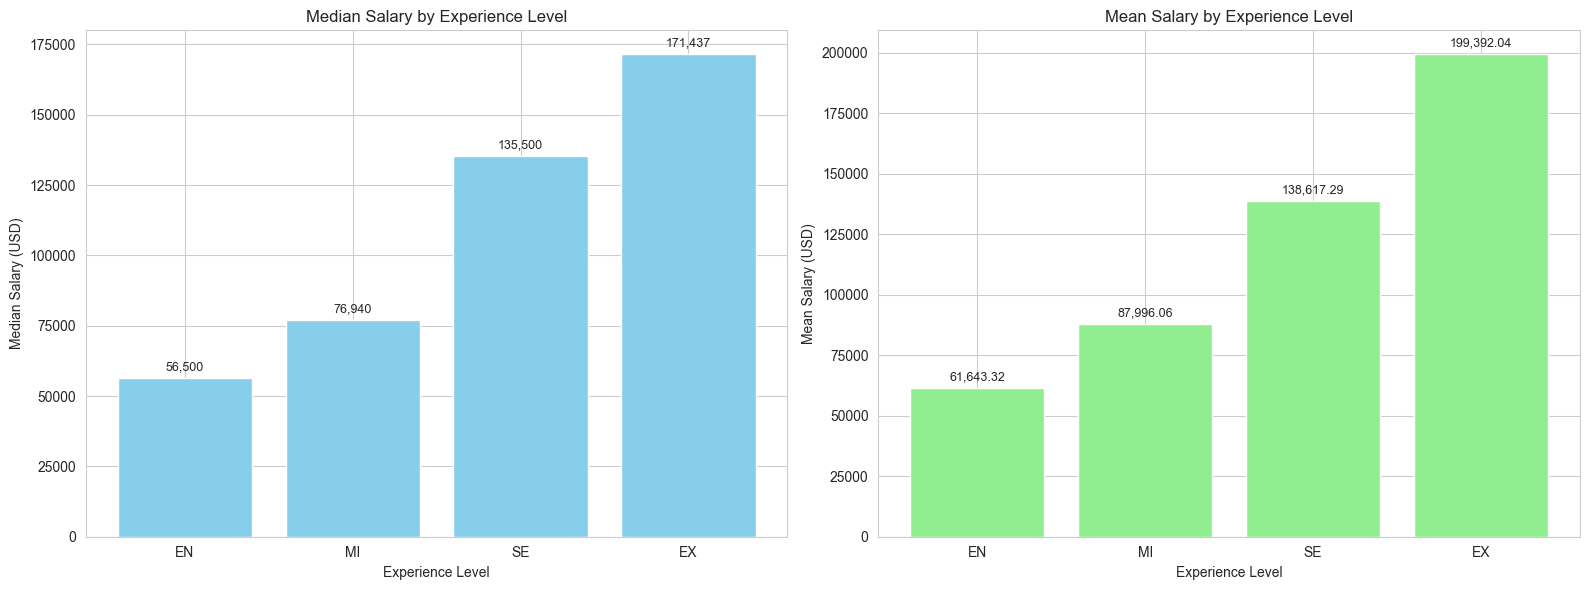

In [144]:
# Visualize using Side by Side Bar Charts
# Create 1x2 subplots
fig, axes = plt.subplots(1, 2, figsize=(16,6))

x = grouped['experience_level']

# --- Left Figure: Median Salary ---
ax1 = axes[0]
ax1.bar(x, grouped['median'], color='skyblue')
ax1.set_title("Median Salary by Experience Level")
ax1.set_xlabel("Experience Level")
ax1.set_ylabel("Median Salary (USD)")

# Add labels
for i, val in enumerate(grouped['median']):
    ax1.text(
        i, 
        val + max(grouped['median'])*0.01, f"{int(val):,}", ha='center', va='bottom', fontsize=9)

# --- Right Figure: Mean Salary ---
ax2 = axes[1]
ax2.bar(x, grouped['mean'], color='lightgreen')
ax2.set_title("Mean Salary by Experience Level")
ax2.set_xlabel("Experience Level")
ax2.set_ylabel("Mean Salary (USD)")

# Add labels
for i, val in enumerate(grouped['mean']):
    ax2.text(
        i, 
        val + max(grouped['mean']) * 0.01, 
        f"{val:,.2f}",   # Format number with commas and 2 decimals
        ha='center', 
        va='bottom', 
        fontsize=9
    )

plt.tight_layout()
plt.show()

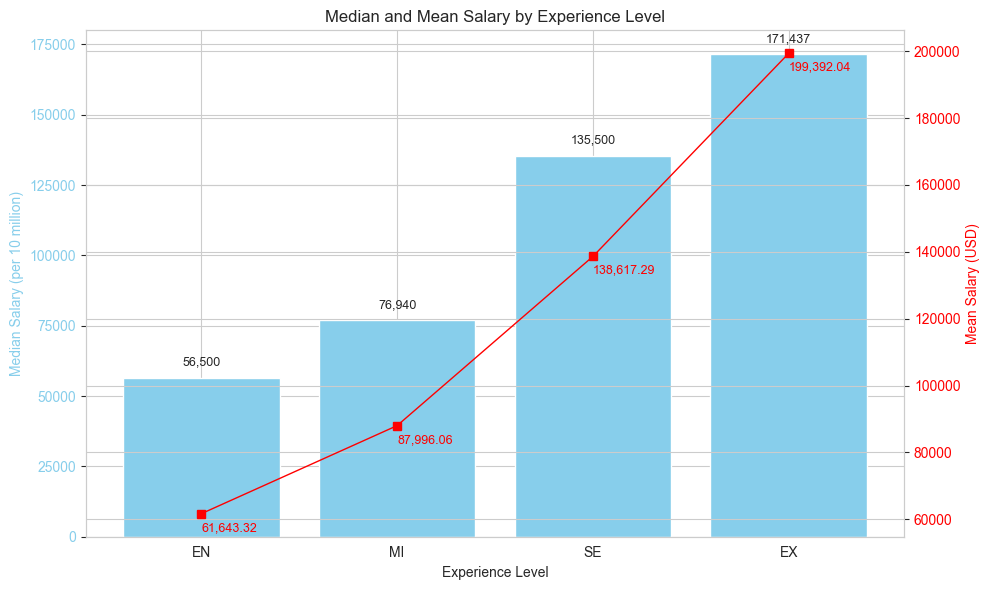

In [146]:
# Visualize by Overlaying 2 Plots along the same x-axis
# Create Figure and Axes
fig, ax1 = plt.subplots(figsize=(10,6))
x = grouped['experience_level']

# Plot Median Salary of Left y-axis
ax1.bar(x, grouped['median'], color='skyblue', label='Median Salary')
ax1.set_xlabel('Experience Level')
ax1.set_ylabel('Median Salary (per 10 million)', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Set Labels for Left Plot
for i, val in enumerate(grouped['median']):
    ax1.text(i, val + max(grouped['median'])*0.02, f"{int(val):,}", ha='center', va='bottom', fontsize=9)

# Plot Mean Salary of Right y-axis
ax2 = ax1.twinx()
color = 'red'
ax2.plot(x, grouped['mean'], color=color, marker='s', linewidth=1, label='Mean Salary')
ax2.set_ylabel('Mean Salary (USD)', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add labels on mean salary points
for i, val in enumerate(grouped['mean']):
    ax2.text(i, val - max(grouped['mean'])*0.03, f"{round(val,2):,.2f}", ha='left', va='bottom', fontsize=9, color=color)

# Title and layout
plt.title('Median and Mean Salary by Experience Level')
fig.tight_layout()
plt.show()

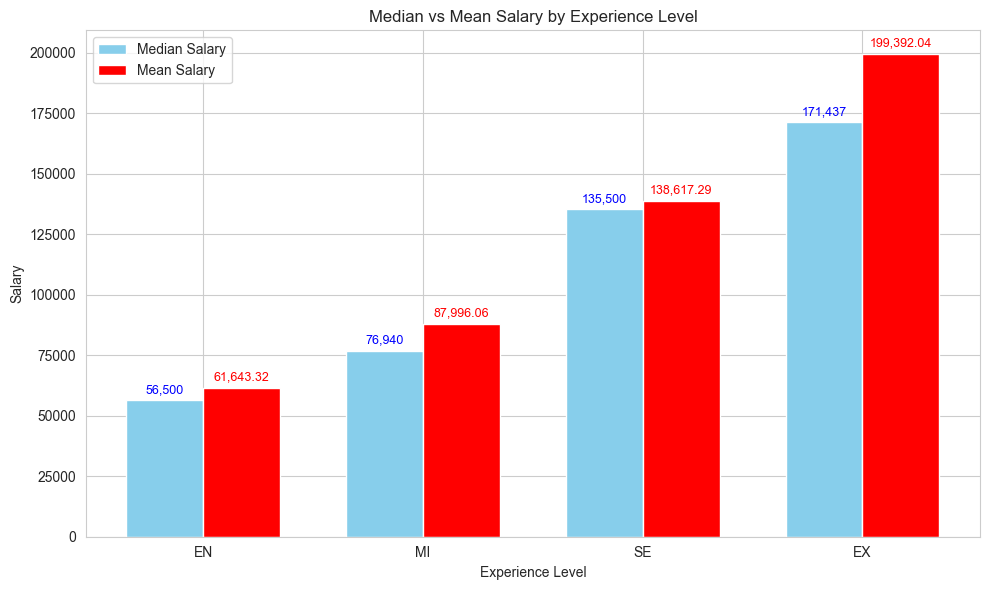

In [150]:
# Plot them side-by-side on the same Plot
x = np.arange(len(grouped['experience_level']))  # positions for bars
width = 0.35  # width of each bar

fig, ax = plt.subplots(figsize=(10,6))

# Median bars (shifted left)
bars1 = ax.bar(x - width/2, grouped['median'], width, label='Median Salary', color='skyblue')

# Mean bars (shifted right)
bars2 = ax.bar(x + width/2, grouped['mean'], width, label='Mean Salary', color='red')

# Labels & formatting
ax.set_xlabel('Experience Level')
ax.set_ylabel('Salary')
ax.set_title('Median vs Mean Salary by Experience Level')
ax.set_xticks(x)
ax.set_xticklabels(grouped['experience_level'])
ax.legend()

# Add labels on bars
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + max(grouped['median'])*0.01,
            f"{int(height):,}", ha='center', va='bottom', fontsize=9, color='blue')

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + max(grouped['mean'])*0.01,
            f"{round(height,2):,.2f}", ha='center', va='bottom', fontsize=9, color='red')

plt.tight_layout()
plt.show()